In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [25]:
df=[0]*10
name=["Amazon","Amd","Apple","Cisco","Meta","Microsoft","Netflix","Qualcom","Starbucks","Tesla"]

In [26]:
df[0]=pd.read_csv("amazon.csv")
df[1]=pd.read_csv("amd.csv")
df[2]=pd.read_csv("apple.csv")
df[3]=pd.read_csv("cisco.csv")
df[4]=pd.read_csv("meta.csv")
df[5]=pd.read_csv("microsoft.csv")
df[6]=pd.read_csv("netflix.csv")
df[7]=pd.read_csv("qualcom.csv")
df[8]=pd.read_csv("starbucks.csv")
df[9]=pd.read_csv("tesla.csv")

In [27]:
for i in range(10):
  df[i].sort_index(ascending=False)
  df[i]['Close/Last']=df[i]['Close/Last'].apply(lambda x: float(x[1:]))
  df[i]=df[i].loc[0:251].sort_index(ascending=False)
  df[i].sort_values(by='Close/Last',ascending=False,inplace=True)
  df[i].reset_index(drop=True,inplace=True)
  df[i][name[i]]=abs((-100/251)*(df[i].index-251))
  


In [28]:
df[0]

,Date,Close/Last,Volume,Open,High,Low,Amazon
0,11/18/2021,184.8030,114070760,$178.3175,$185.21,$178.05,100.000000
1,11/19/2021,183.8285,98924060,$185.6345,$188.1073,$183.786,99.601594
2,11/24/2021,179.0205,46560360,$178.1335,$180.682,$176.8425,99.203187
3,11/23/2021,179.0020,73844920,$179.252,$181.0525,$176.3855,98.804781
4,11/22/2021,178.6285,96957000,$183.8189,$185.6728,$178.375,98.406375
...,...,...,...,...,...,...,...
247,11/04/2022,90.9800,129101300,$91.49,$92.44,$88.04,1.593625
248,11/07/2022,90.5300,77495730,$91.95,$92.1,$89.04,1.195219
249,11/08/2022,89.9800,88703370,$90.79,$91.72,$88.23,0.796813
250,11/03/2022,89.3000,136683300,$92.47,$93.5,$89.02,0.398406


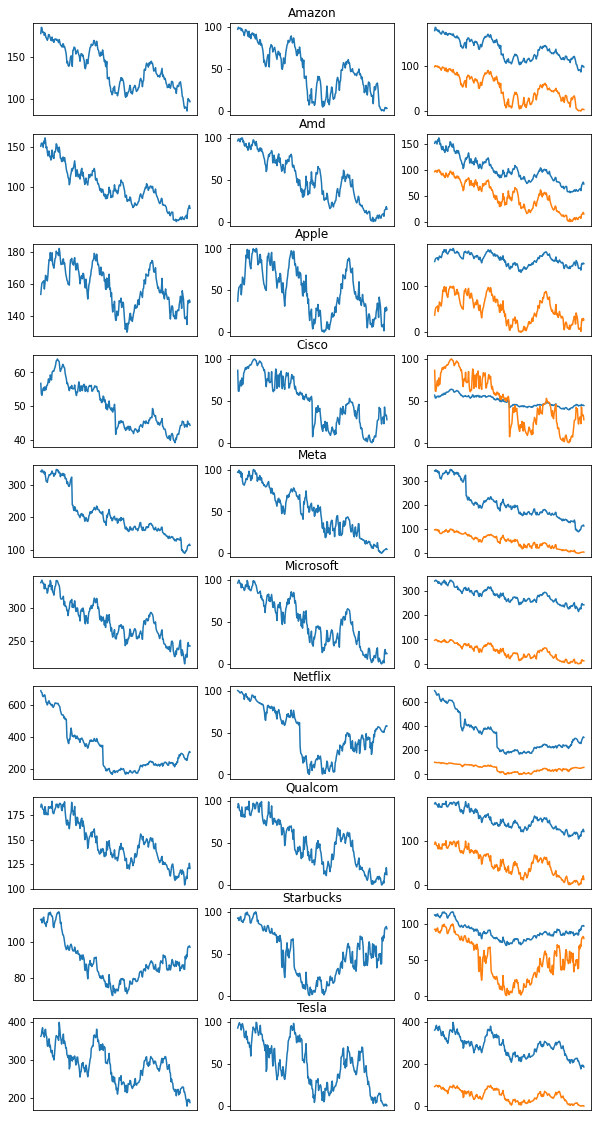

In [30]:
plt.figure(figsize=(10,20))
for i in range(10):
  df[i]=df[i].sort_values(by="Date",key=pd.to_datetime)
  df[i].Date=df[i].Date.apply(lambda x: str(x).replace('-','/'))
  plt.subplot(10,3,3*i+1)
  plt.plot(df[i].Date,df[i]['Close/Last'])
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,3,3*i+2)
  plt.plot(df[i].Date,df[i][name[i]])
  plt.title(name[i])
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,3,3*i+3)
  plt.plot(df[i]['Date'],df[i]['Close/Last'])
  plt.plot(df[i]['Date'],df[i][name[i]])
  plt.gca().axes.xaxis.set_visible(False)

In [8]:
for i in range(10):
  df[i]=df[i][['Date',name[i]]]
  df[i].index=df[i].Date
  df[i]=df[i].drop(axis=1,columns=['Date'])
  df[i].to_csv(name[i]+"_2.csv")

In [35]:
df=[0,0,0,0,0,0,0,0,0,0]
df[0]=pd.read_csv("amazon.csv")
df[1]=pd.read_csv("amd.csv")
df[2]=pd.read_csv("apple.csv")
df[3]=pd.read_csv("cisco.csv")
df[4]=pd.read_csv("meta.csv")
df[5]=pd.read_csv("microsoft.csv")
df[6]=pd.read_csv("netflix.csv")
df[7]=pd.read_csv("qualcom.csv")
df[8]=pd.read_csv("starbucks.csv")
df[9]=pd.read_csv("tesla.csv")
for i in range(10):
  df[i]=df[i].sort_values(by='Date',key=pd.to_datetime,ascending=True)
  df[i]['Close/Last']=df[i]['Close/Last'].apply(lambda x: float(x[1:]))

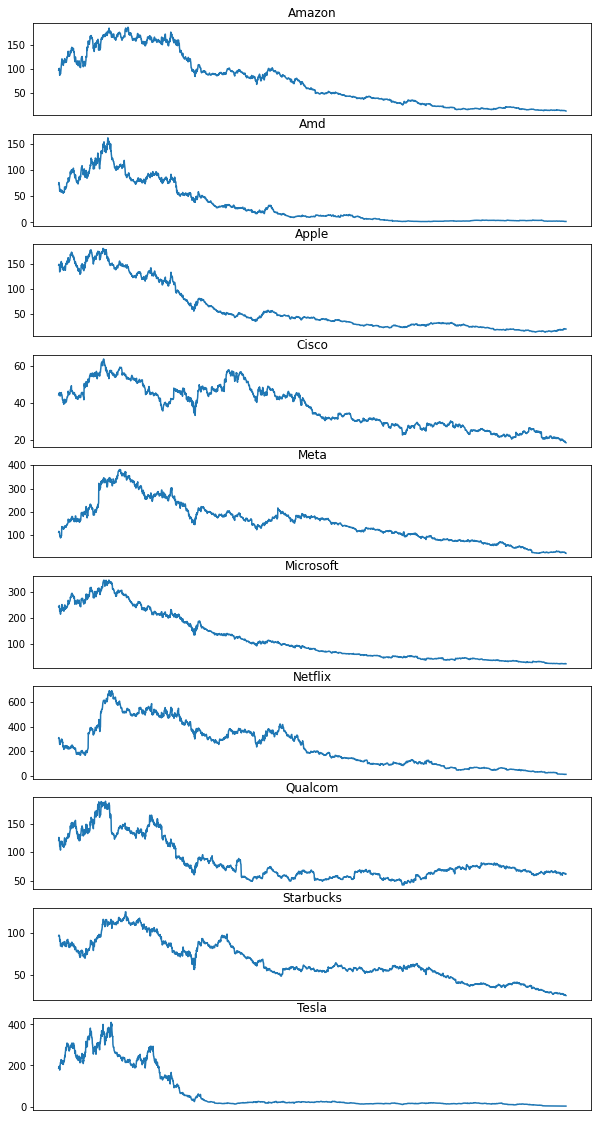

In [36]:
plt.figure(figsize=(10,20))
for i in range(10):
  plt.subplot(10,1,i+1)
  plt.plot(df[i]['Close/Last'])
  plt.gca().axes.xaxis.set_visible(False)
  plt.title(name[i])

In [37]:
for i in range(10):
  up=df[i]["Close/Last"].diff()
  down=df[i]["Close/Last"].diff()
  up[up < 0] = 0
  down[down > 0] = 0

  period = [2,3,7,14,21,28,35]
  for p in period:
    exp_moving_avg_up = up.ewm(com = p-1, min_periods = p,adjust=True).mean()
    exp_moving_avg_down = down.abs().ewm(com = p-1, min_periods = p,adjust=True).mean()
    pname="rsi_"+str(p)
    rsi=exp_moving_avg_up/exp_moving_avg_down
    rsi=100-(100/(1+rsi))
    df[i][pname]=rsi
  df[i]=df[i].loc[251:]
  df[i].reset_index(drop=True,inplace=True)

rsi는 가격상승/가격하락의 상대적인 강도를 표현한다.
rsi의 식은 다음과 같다.

RSI = $100-100\frac{100}{1+\frac{previous\ avg\ gain\ *\ period-1}{previous\ avg\ loss\ *\ period-1}}$


rsi는 0-100 scale을 가지기 때문에, momentum score로 사용할 수 있다.


linear interpolation 방법의 경우 252일동안의 data를 모두 보고 이를 linearization하여 score를 계산한다.


하지만 rsi의 경우 특정한 period를 정하여 계산하기 때문에 period동안의 추세를 더 정확히 반영할 수 있다.

rsi를 exponential moving average를 사용해 계산하였고, ema를 계산하는 데에는 pd.ewm method를 사용하였다.

In [38]:
df[0]

,Date,Close/Last,Volume,Open,High,Low,rsi_2,rsi_3,rsi_7,rsi_14,rsi_21,rsi_28,rsi_35
0,11/17/2021,177.4500,51205400,$178.236,$179.3623,$177.2675,77.605547,69.504132,63.400628,60.058955,57.897221,56.433845,55.439432
1,11/18/2021,184.8030,114070760,$178.3175,$185.21,$178.05,98.047867,92.925360,78.073326,68.868830,64.515803,61.817743,59.991660
2,11/19/2021,183.8285,98924060,$185.6345,$188.1073,$183.786,78.946308,80.616910,73.516275,66.766922,63.134691,60.785319,59.167030
3,11/22/2021,178.6285,96957000,$183.8189,$185.6728,$178.375,25.639139,39.130899,53.922453,56.804209,56.373148,55.642870,55.013223
4,11/23/2021,179.0020,73844920,$179.252,$181.0525,$176.3855,32.214338,42.328438,54.929074,57.297094,56.722702,55.920642,55.245539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11/10/2022,96.6300,173414900,$92.935,$98.69,$91.65,81.881498,71.021759,48.067470,40.655612,39.918074,40.437508,41.173047
248,11/11/2022,100.7900,111590500,$97.88,$101.19,$96.66,88.972053,79.424256,56.022232,45.866983,43.674926,43.327329,43.495966
249,11/14/2022,98.4900,99533070,$98.77,$100.1199,$97.29,62.099431,64.027517,50.984794,43.587913,42.145069,42.154668,42.539922
250,11/15/2022,98.9400,111336300,$103.21,$103.79,$97.34,66.105351,65.963900,51.970593,44.172401,42.558420,42.470590,42.793173


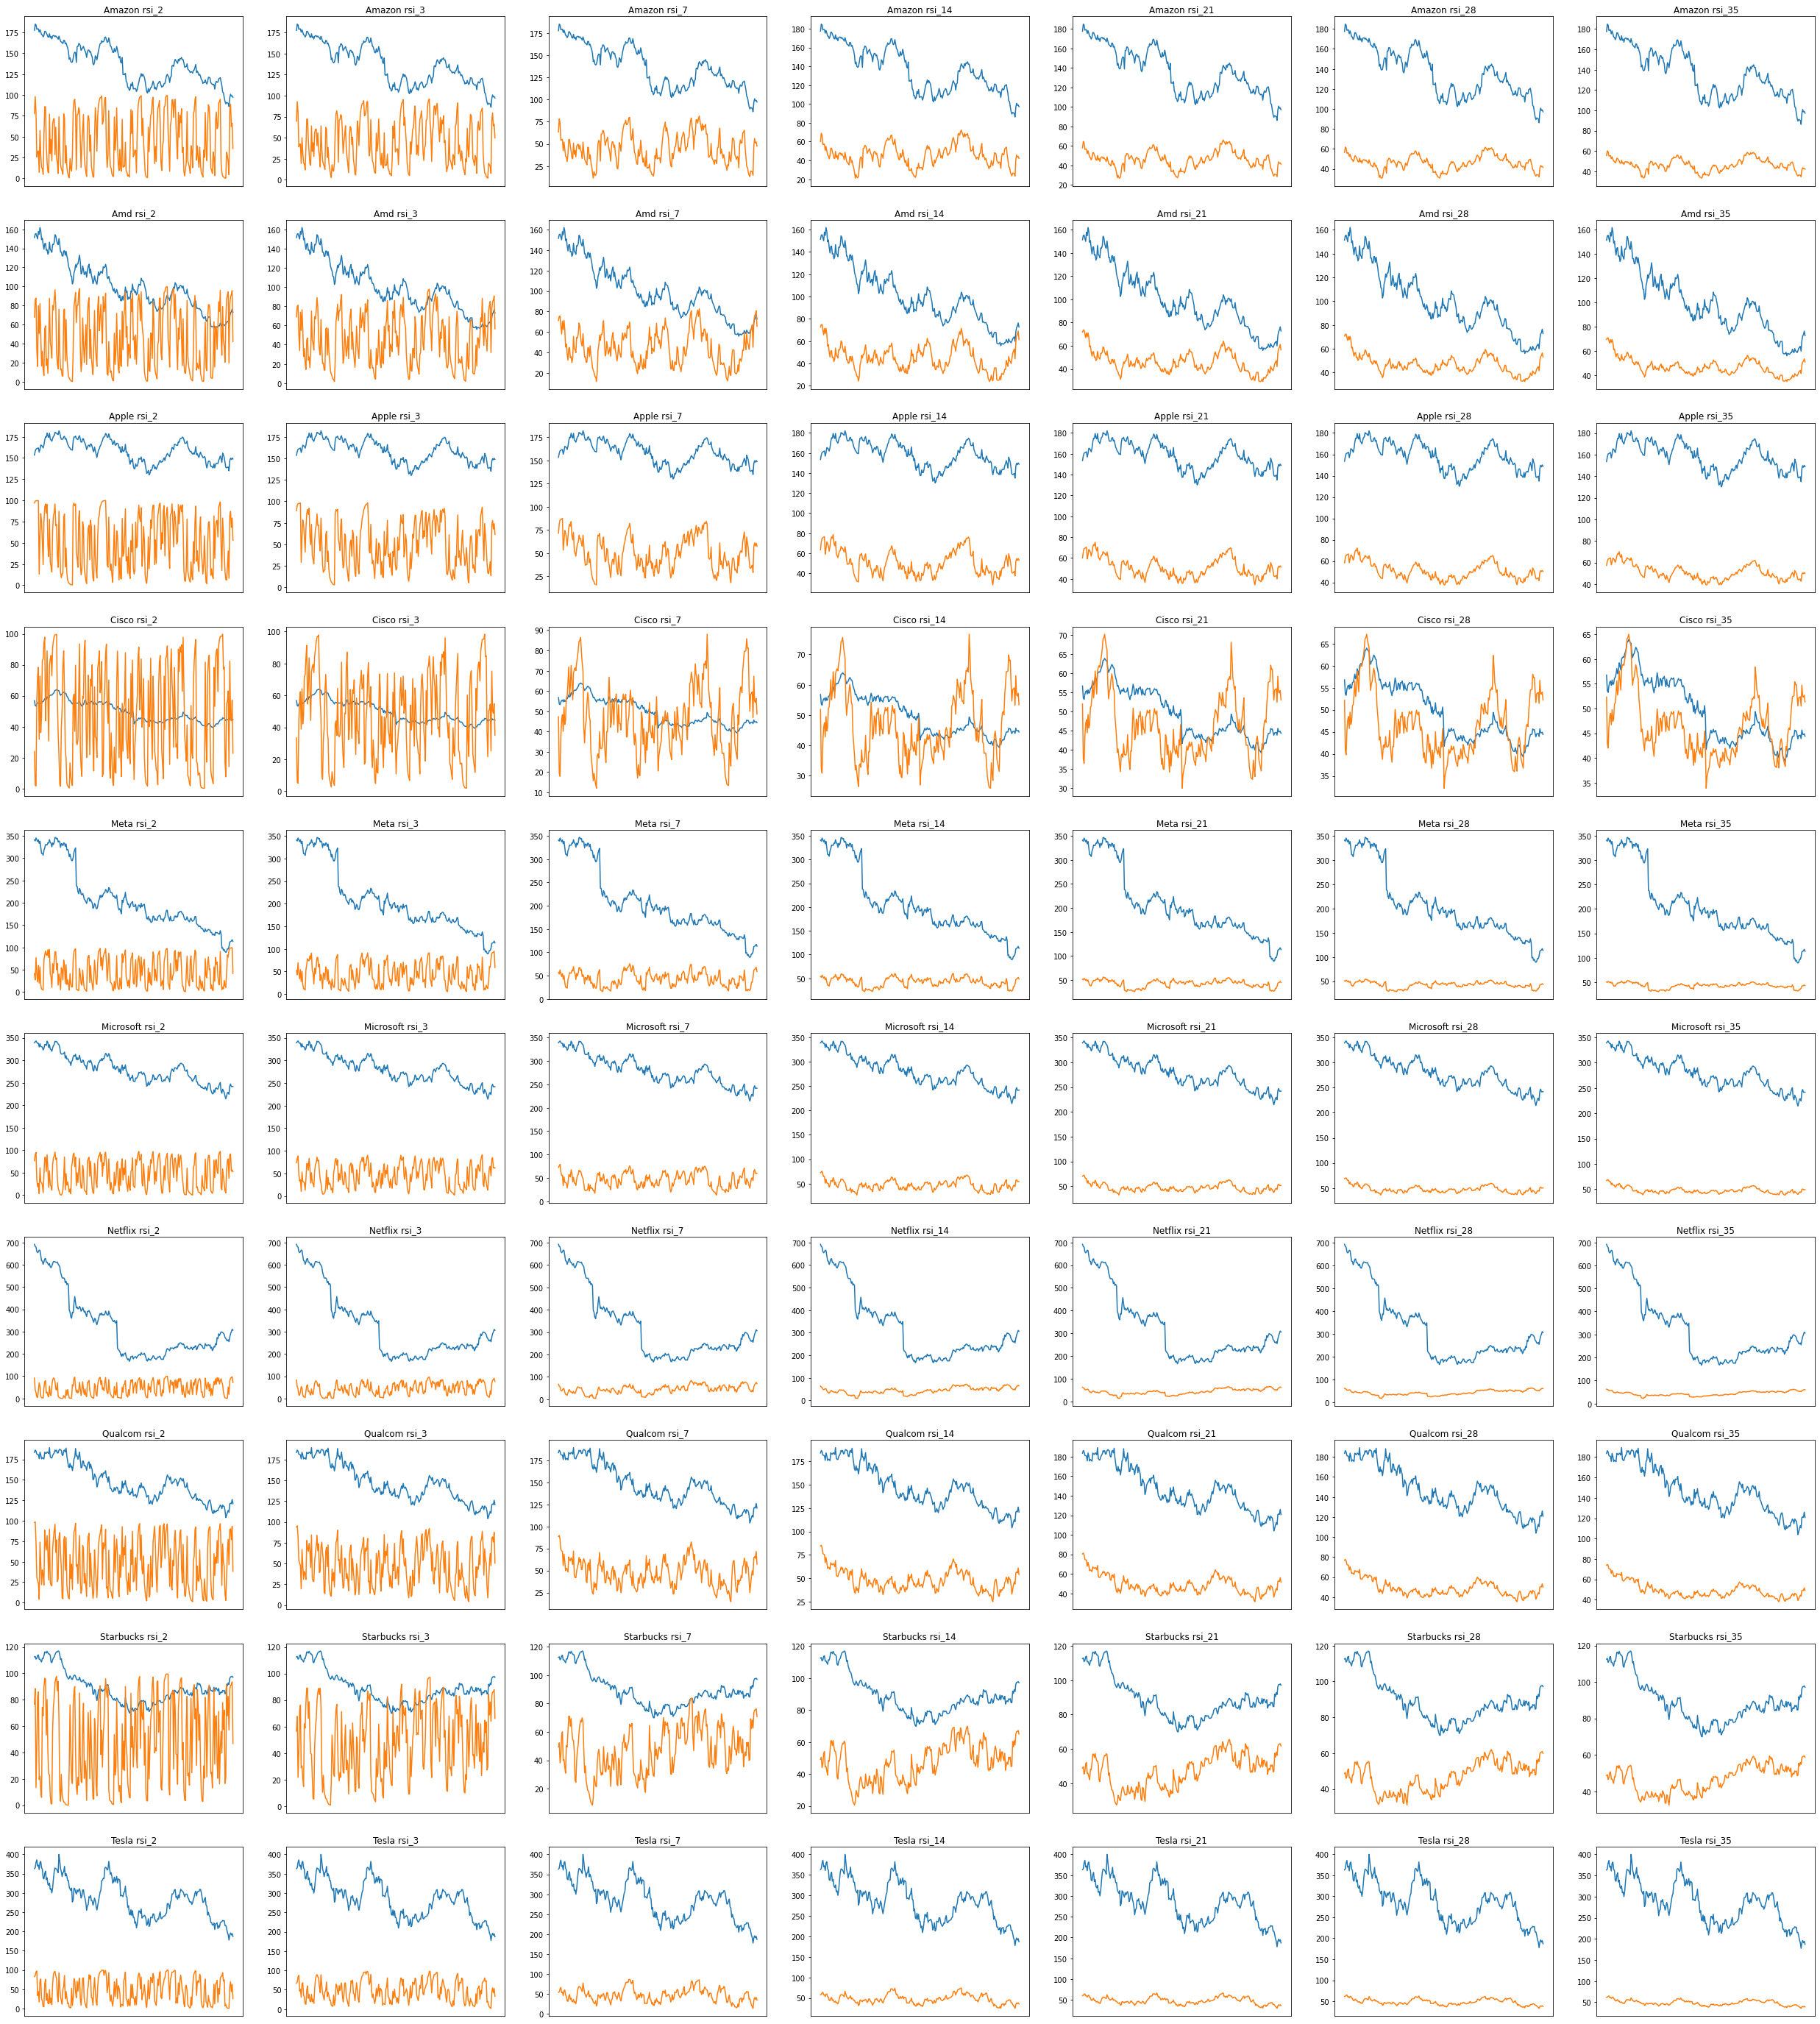

In [22]:
plt.figure(figsize=(50,50))
for i in range(10):
  plt.subplot(10,8,8*i+1)
  plt.plot(df[i]['Close/Last'])
  plt.plot(df[i]['rsi_2'])
  plt.title(name[i]+" rsi_2")
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,8,8*i+2)
  plt.plot(df[i]['Close/Last'])
  plt.plot(df[i]['rsi_3'])
  plt.title(name[i]+' rsi_3')
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,8,8*i+3)
  plt.plot(df[i]['Close/Last'])
  plt.plot(df[i]['rsi_7'])
  plt.title(name[i]+' rsi_7')
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,8,8*i+4)
  plt.plot(df[i]['Close/Last'])
  plt.plot(df[i]['rsi_14'])
  plt.title(name[i]+' rsi_14')
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,8,8*i+5)
  plt.plot(df[i]['Close/Last'])
  plt.plot(df[i]['rsi_21'])
  plt.title(name[i]+' rsi_21')
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,8,8*i+6)
  plt.plot(df[i]['Close/Last'])
  plt.plot(df[i]['rsi_28'])
  plt.title(name[i]+' rsi_28')
  plt.gca().axes.xaxis.set_visible(False)
  plt.subplot(10,8,8*i+7)
  plt.plot(df[i]['Close/Last'])
  plt.plot(df[i]['rsi_35'])
  plt.title(name[i]+' rsi_35')
  plt.gca().axes.xaxis.set_visible(False)
  

In [43]:
for i in range(10):
  new=df[i][['Date','rsi_2','rsi_3','rsi_14','rsi_21','rsi_28','rsi_35']]
  new.index=new.Date
  new=new.drop(axis=1,columns=['Date'])
  new.to_csv(name[i]+"_3.csv")

적절히 단기적 시점과 장기적 시점의 장점을 다 가져갈 수 있는 rsi 14를 사용하는 것이 가장 좋아보이고,

그 외에는 약간 길게 보는 것이 필요할 때 rsi 21을 사용하고, 단기적으로 보는 것이 필요할 때는 rsi 7을 사용하는 것이 좋을 것이다. 